# Lab 4: Geovisualization Tools II - Apps

## Challenge 1

### 1. Is higher mean node degree associated with greater commercial activity? Comparison of Barcelona and Edinburgh
For our comparison, we will focus on the relationship commercial activity and the network indicator mean node degree. The hypothesis is that commercial activity would concentrate in important hubs, where importance is measured by mean node degree.

Here, we aim to explore to what extent is it the case in two European cities, Edinburgh and Barcelona. Based on exploratory analysis, we selected these two cities because they visibly differ in their urban morfology. The density and connecteness of streets as well as number of nodes is relatively even across different subzones in Edinburgh. In contrast, in Barcelona, there is a larger spatial variation in various network indicators across subzones.

### Barcelona
As the scatterplot indicates, there appears to be a consistent, relatively strong linear relationship between mean node degree and commercial activity. This suggests that commercial activities indeed tends to concentrated in areas with a higher degree of centrality, as measured by mean node degree. 

### Edinburgh
In contrast, there does not seem to be any visible relationship between mean node degree and commerial activity in Edinburgh. If we had the chance to quantify this relationship, we would find some positive correlation due to an outlier - there is a subzone with a substantially more commercial activity with the second highest mean node degree. This suggests that in Edinburgh, there is one subzone where a bulk of commercial activity is concentrated, but there is no discernable relationship between these two variables.

It is important to note that this analysis is merely indicative, presenting some correlational results focusing only on two cities. Moreover, the Urbanity dashboard does not allow us to quantify these relationships by calculation correlations or regression coefficients.


### 2. Main caveats, pitfalls and assumptions
In this section, we briefly discuss some limitations with regards to the dashboard itself as well as on this approach more broadly. 

1. Lack of explanations and resources: the dashboard includes some impressive visualization tools and a good range of variables, but it is often unclear what is meant by some of the measures and how they were constructed. The scatterplots do not display any measure of the strengh of a relationship, neither units on the x- and y-axis making them of limited use for more robust quantitative analysis.
    
2. User Experience: This dashboard is a unique tool to explore urban networks without any coding, but there is a room for improvement in its UI. This the dashboard can be quite hard to navigate, slow to load, visualizations are inflexible and often imprecise.
   
3. Limitations of network approaches: Representing cities as urban networks can provide invaluable insights for researchers and practicioners alike but cities are much more complex and there are limitations to hwo much can be captured by network measures.

## Challenge 2

In this challenge, we created a dashboard of factors related to urban heat islands in Richmond, Virginia using the ArcGIS dashboard.

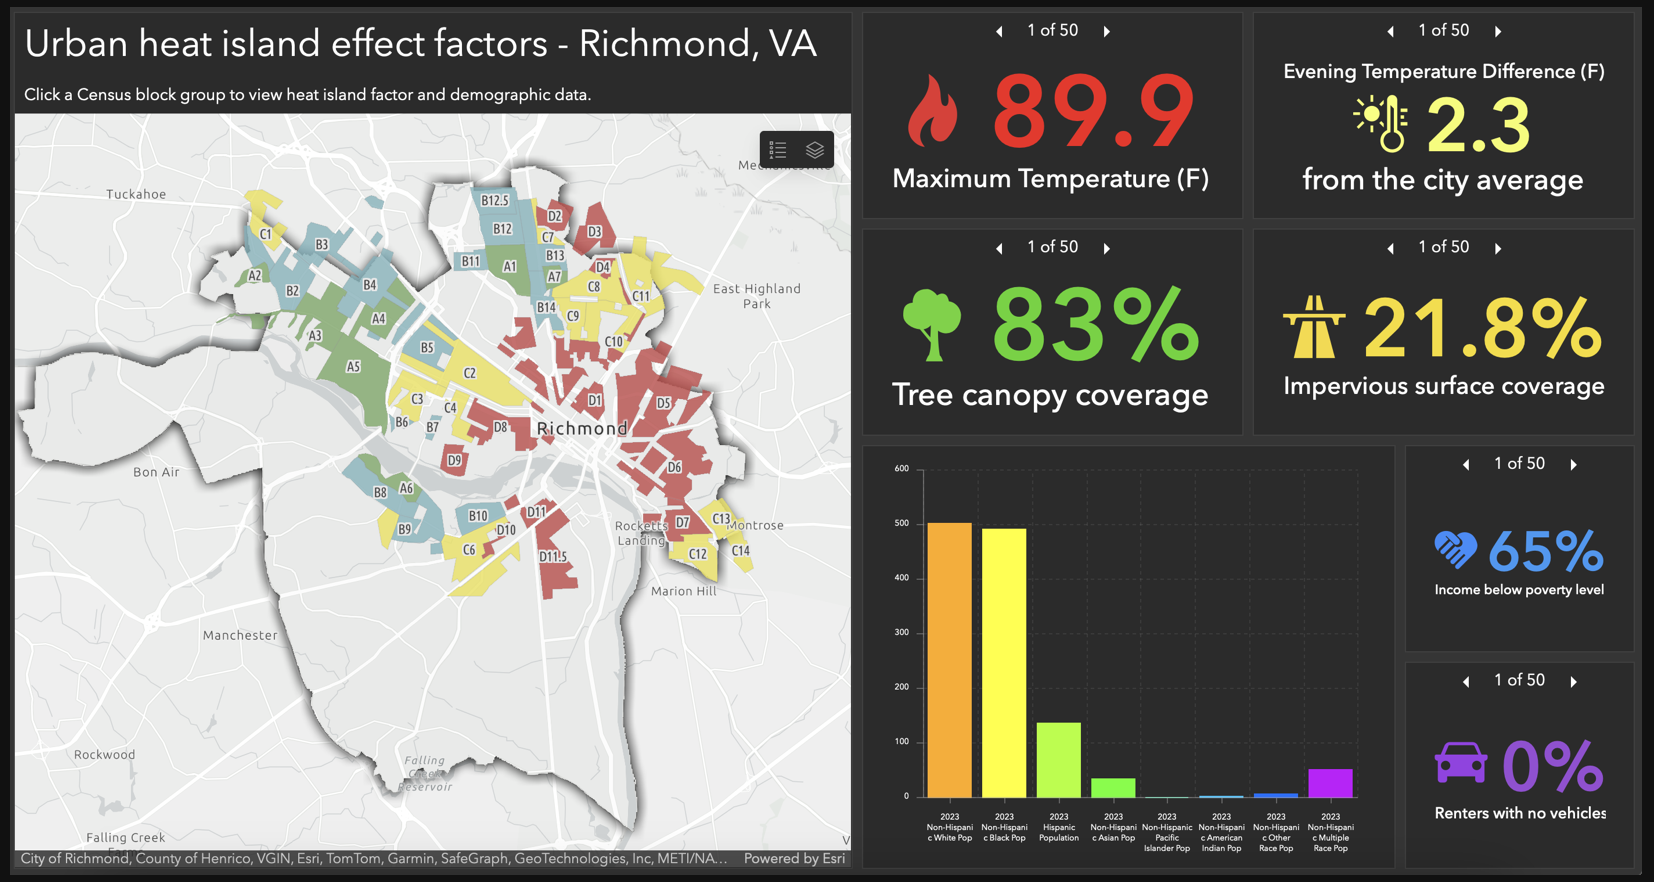

Link to the dashboard: https://www.arcgis.com/apps/dashboards/1036b0767eae4b05af537eb92d1faab9

## Challenge 3

In this challenge, we visualize various aspects of deprivation in Edinburgh. We will work with data on Scottish multiple deprivation index available at https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/home.

We focus on two attributes associated with deprivation: income rank and standardized mortality rate which we subsequently visualize in the form of static and interactive maps using different classification scheme.

In [2]:
import geopandas as gpd

# read the data 
simd_path = 'data_lab4/SG_SIMD_2020/SG_SIMD_2020.shp'
simd = gpd.read_file(simd_path)

In [3]:
# check unique values of areas and find Edinburgh
simd["LAName"].unique()

array(['Aberdeen City', 'Aberdeenshire', 'Angus', 'Argyll and Bute',
       'Clackmannanshire', 'Dumfries and Galloway', 'Dundee City',
       'East Ayrshire', 'East Dunbartonshire', 'East Lothian',
       'East Renfrewshire', 'City of Edinburgh', 'Na h-Eileanan an Iar',
       'Falkirk', 'Fife', 'Glasgow City', 'Highland', 'Inverclyde',
       'Midlothian', 'Moray', 'North Ayrshire', 'North Lanarkshire',
       'Orkney Islands', 'Perth and Kinross', 'Renfrewshire',
       'Scottish Borders', 'Shetland Islands', 'South Ayrshire',
       'South Lanarkshire', 'Stirling', 'West Dunbartonshire',
       'West Lothian'], dtype=object)

In [4]:
# Filter only for Edinburgh
edinburgh = simd[simd['LAName'] == 'City of Edinburgh']
edinburgh.head()

,DataZone,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,...,CrimeRate,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry
1911,S01008417,Balerno and Bonnington Village - 01,City of Edinburgh,708,397,5537,4,8,16,80,...,86,5392.0,17,8,2%,1%,6350.0,20191.721420,1.029993e+07,"POLYGON ((315157.369 666212.846, 315173.727 66..."
1912,S01008418,Balerno and Bonnington Village - 02,City of Edinburgh,691,378,6119,5,9,18,88,...,103,5063.0,7,10,1%,1%,6650.0,25944.861787,2.357050e+07,"POLYGON ((317816.000 666579.000, 318243.000 66..."
1913,S01008419,Balerno and Bonnington Village - 03,City of Edinburgh,541,338,5200,4,8,15,75,...,187,3594.0,30,0,6%,0%,5372.5,5738.935106,1.366457e+06,"POLYGON ((316831.000 667049.000, 316816.000 66..."
1914,S01008420,Balerno and Bonnington Village - 04,City of Edinburgh,466,274,6431,5,10,19,93,...,109,4957.0,2,0,0%,0%,6957.0,1890.096713,1.051967e+05,"POLYGON ((316368.000 666124.000, 316379.297 66..."
1915,S01008421,Balerno and Bonnington Village - 05,City of Edinburgh,884,537,3441,3,5,10,50,...,264,2575.0,61,6,7%,1%,4598.0,2645.609037,1.465441e+05,"POLYGON ((316411.427 666596.771, 316422.940 66..."


In [5]:
edinburgh.columns

Index(['DataZone', 'DZName', 'LAName', 'SAPE2017', 'WAPE2017', 'Rankv2',
       'Quintilev2', 'Decilev2', 'Vigintilv2', 'Percentv2', 'IncRate',
       'IncNumDep', 'IncRankv2', 'EmpRate', 'EmpNumDep', 'EmpRank', 'HlthCIF',
       'HlthAlcSR', 'HlthDrugSR', 'HlthSMR', 'HlthDprsPc', 'HlthLBWTPc',
       'HlthEmergS', 'HlthRank', 'EduAttend', 'EduAttain', 'EduNoQuals',
       'EduPartici', 'EduUniver', 'EduRank', 'GAccPetrol', 'GAccDTGP',
       'GAccDTPost', 'GAccDTPsch', 'GAccDTSsch', 'GAccDTRet', 'GAccPTGP',
       'GAccPTPost', 'GAccPTRet', 'GAccBrdbnd', 'GAccRank', 'CrimeCount',
       'CrimeRate', 'CrimeRank', 'HouseNumOC', 'HouseNumNC', 'HouseOCrat',
       'HouseNCrat', 'HouseRank', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

### 3.2 Plot two attributes: Income Rank and Standardized Mortality Ratio

The following code visualizes income rank and standardized mortality ratio across data zones in Edinburgh. First, we plot histograms of distribution of values for both variables. Subsequently, for each of the variables, we create two classification schemes.

Lastly, we create static maps of income ranks and mortality ratios across data zones with two different, previously defined, classification schemes.

/Users/ninabucekova/miniconda3/envs/ua/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ninabucekova/miniconda3/envs/ua/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


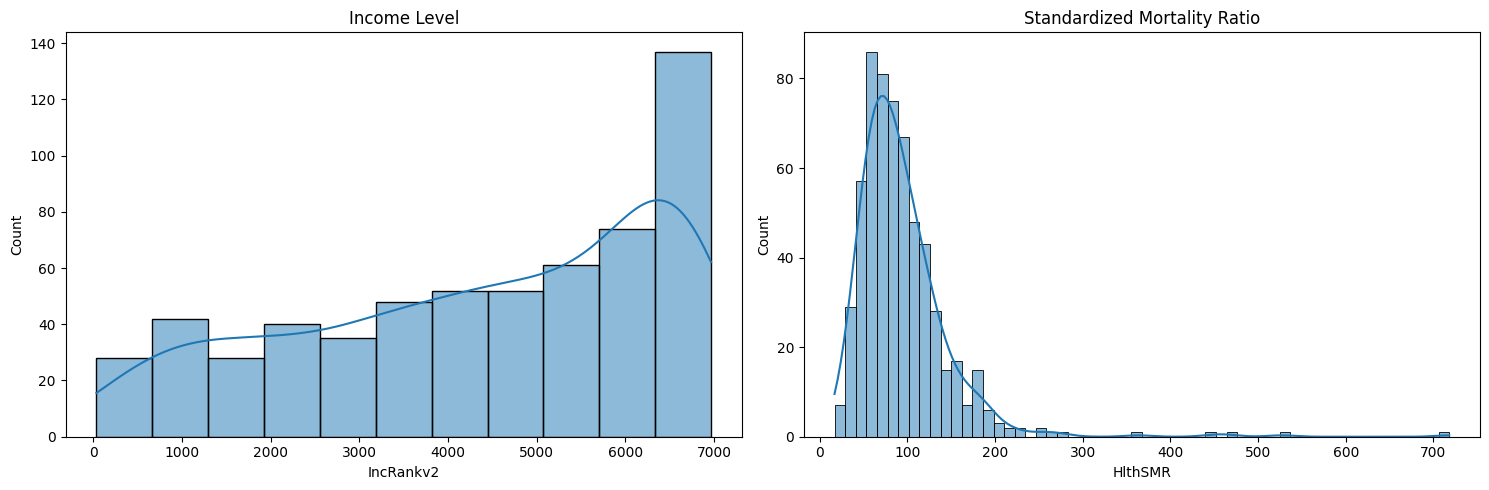

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=edinburgh, x="IncRankv2",ax=axes[0], kde=True) 
sns.histplot(data=edinburgh, x="HlthSMR",ax=axes[1], kde=True) # Number of working age people who are employment deprived

axes[0].set_title("Income Level")
axes[1].set_title("Standardized Mortality Ratio")

plt.tight_layout()
plt.show()

#### 3.2.1 Income Rank

For our first attribute, we first define classification schemes and visualize the breaks on histograms.

In [10]:
import mapclassify as mc

# Set Number of classes for classification
num_classes = 5

# Using Natural Breaks (Jenks) classification
classifier_nb = mc.NaturalBreaks(edinburgh['IncRankv2'].astype(float), k=num_classes)
print(classifier_nb)
print(min(classifier_nb.bins), max(classifier_nb.bins))
print(classifier_nb.bins) 

# Using Equal Interval classification
classifier_ei = mc.EqualInterval(edinburgh['IncRankv2'].astype(float), k=num_classes)
print(classifier_ei)
print(min(classifier_ei.bins), max(classifier_ei.bins))
print(classifier_ei.bins)

NaturalBreaks

     Interval        Count
--------------------------
[  34.00, 1506.00] |    78
(1506.00, 2986.00] |    82
(2986.00, 4428.00] |   113
(4428.00, 5779.00] |   122
(5779.00, 6969.00] |   202
1506.0 6969.0
[1506. 2986. 4428. 5779. 6969.]
EqualInterval

     Interval        Count
--------------------------
[  34.00, 1421.00] |    76
(1421.00, 2808.00] |    74
(2808.00, 4195.00] |   100
(4195.00, 5582.00] |   128
(5582.00, 6969.00] |   219
1421.0 6969.0
[1421. 2808. 4195. 5582. 6969.]


/Users/ninabucekova/miniconda3/envs/ua/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ninabucekova/miniconda3/envs/ua/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


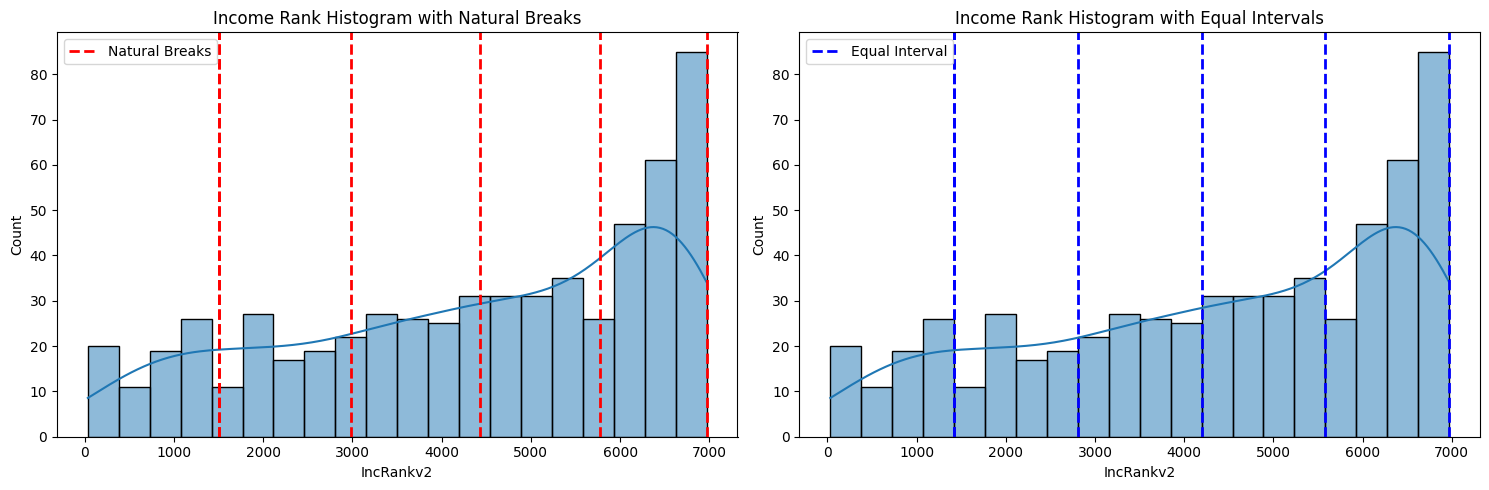

In [11]:
# Create histograms with lines representing breaks 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Using Natural Breaks
sns.histplot(data=edinburgh, x="IncRankv2", ax=axes[0], kde=True, bins=20)
axes[0].axvline(classifier_nb.bins[0], color='red', linestyle='dashed', linewidth=2, label='Natural Breaks')
for bin_value in classifier_nb.bins:
    axes[0].axvline(bin_value, color='red', linestyle='dashed', linewidth=2)
axes[0].set_title("Income Rank Histogram with Natural Breaks")
axes[0].legend()

# Using Equal Intervals
sns.histplot(data=edinburgh, x="IncRankv2", ax=axes[1], kde=True, bins=20)
axes[1].axvline(classifier_ei.bins[0], color='blue', linestyle='dashed', linewidth=2, label='Equal Interval')
for bin_value in classifier_ei.bins:
    axes[1].axvline(bin_value, color='blue', linestyle='dashed', linewidth=2)
axes[1].set_title("Income Rank Histogram with Equal Intervals")
axes[1].legend()

plt.tight_layout()
plt.show()

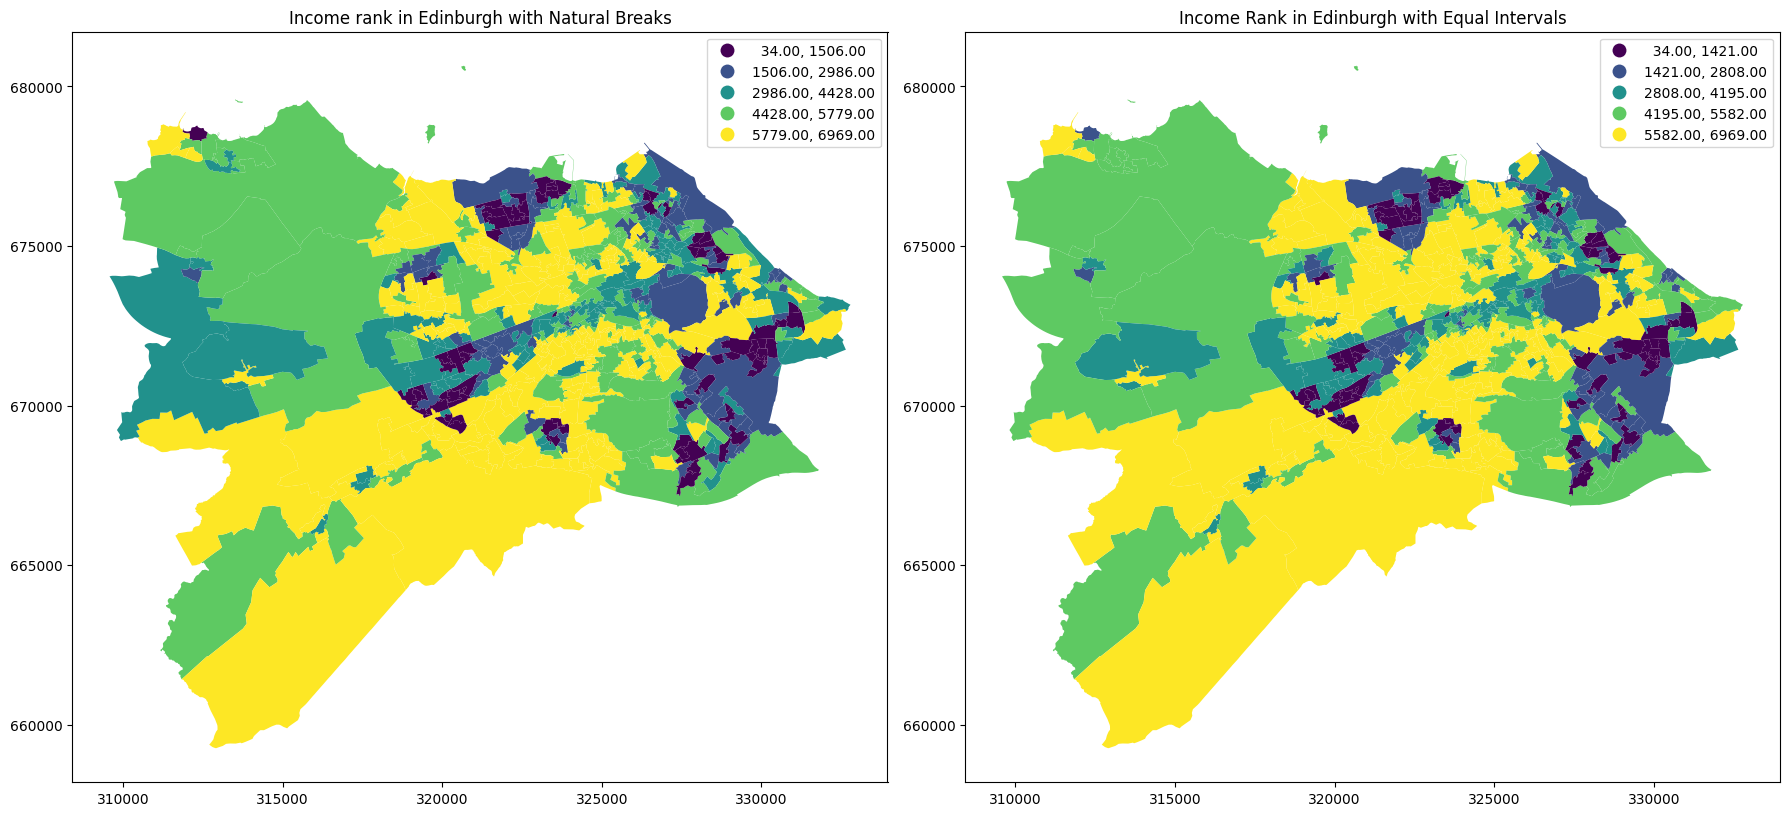

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# First map with natural breaks classification
edinburgh.plot(column='IncRankv2', ax=axs[0],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_nb.bins}
        )

axs[0].set_title("Income rank in Edinburgh with Natural Breaks")

# Second map with equal interval classificationn
edinburgh.plot(column='IncRankv2', ax=axs[1],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_ei.bins})

axs[1].set_title("Income Rank in Edinburgh with Equal Intervals")

plt.tight_layout()
plt.show()

#### 3.2.2 Standardized Mortality Ratio

We repeat the same proceduce as above to first define classification schemes and then we use them for mapping of standardized mortality ratio. The only difference is that we use quantile classification instead of equal interval classification.

In [13]:
# Number of classes for classification
num_classes = 5

# Using Natural Breaks (Jenks) classification
classifier_nb = mc.NaturalBreaks(edinburgh['HlthSMR'].astype(float), k=num_classes)
print(classifier_nb)
print(min(classifier_nb.bins), max(classifier_nb.bins))
print(classifier_nb.bins) 

# Using Quantile classification
classifier_q = mc.Quantiles(edinburgh['HlthSMR'].astype(float), k=num_classes)
print(classifier_q)
print(min(classifier_q.bins), max(classifier_q.bins))
print(classifier_q.bins)

NaturalBreaks

    Interval       Count
------------------------
[ 17.00,  70.00] |   215
( 70.00, 107.00] |   212
(107.00, 160.00] |   125
(160.00, 278.00] |    40
(278.00, 718.00] |     5
70.0 718.0
[ 70. 107. 160. 278. 718.]
Quantiles

    Interval       Count
------------------------
[ 17.00,  58.00] |   123
( 58.00,  74.40] |   116
( 74.40,  93.00] |   121
( 93.00, 121.00] |   118
(121.00, 718.00] |   119
58.0 718.0
[ 58.   74.4  93.  121.  718. ]


/Users/ninabucekova/miniconda3/envs/ua/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ninabucekova/miniconda3/envs/ua/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


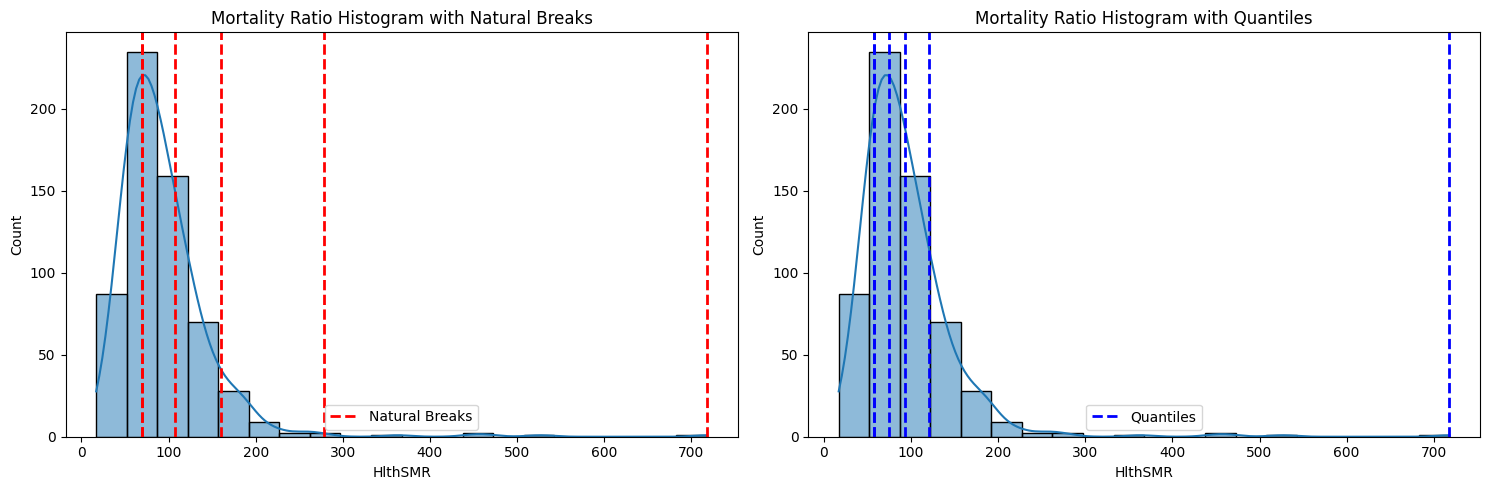

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram of SMR with natural breaks
sns.histplot(data=edinburgh, x="HlthSMR", ax=axes[0], kde=True, bins=20)
axes[0].axvline(classifier_nb.bins[0], color='red', linestyle='dashed', linewidth=2, label='Natural Breaks')
for bin_value in classifier_nb.bins:
    axes[0].axvline(bin_value, color='red', linestyle='dashed', linewidth=2)
axes[0].set_title("Mortality Ratio Histogram with Natural Breaks")
axes[0].legend()

# Histogram of SMR with quantile breaks 
sns.histplot(data=edinburgh, x="HlthSMR", ax=axes[1], kde=True, bins=20)
axes[1].axvline(classifier_q.bins[0], color='blue', linestyle='dashed', linewidth=2, label='Quantiles')
for bin_value in classifier_q.bins:
    axes[1].axvline(bin_value, color='blue', linestyle='dashed', linewidth=2)
axes[1].set_title("Mortality Ratio Histogram with Quantiles")
axes[1].legend()

plt.tight_layout()
plt.show()

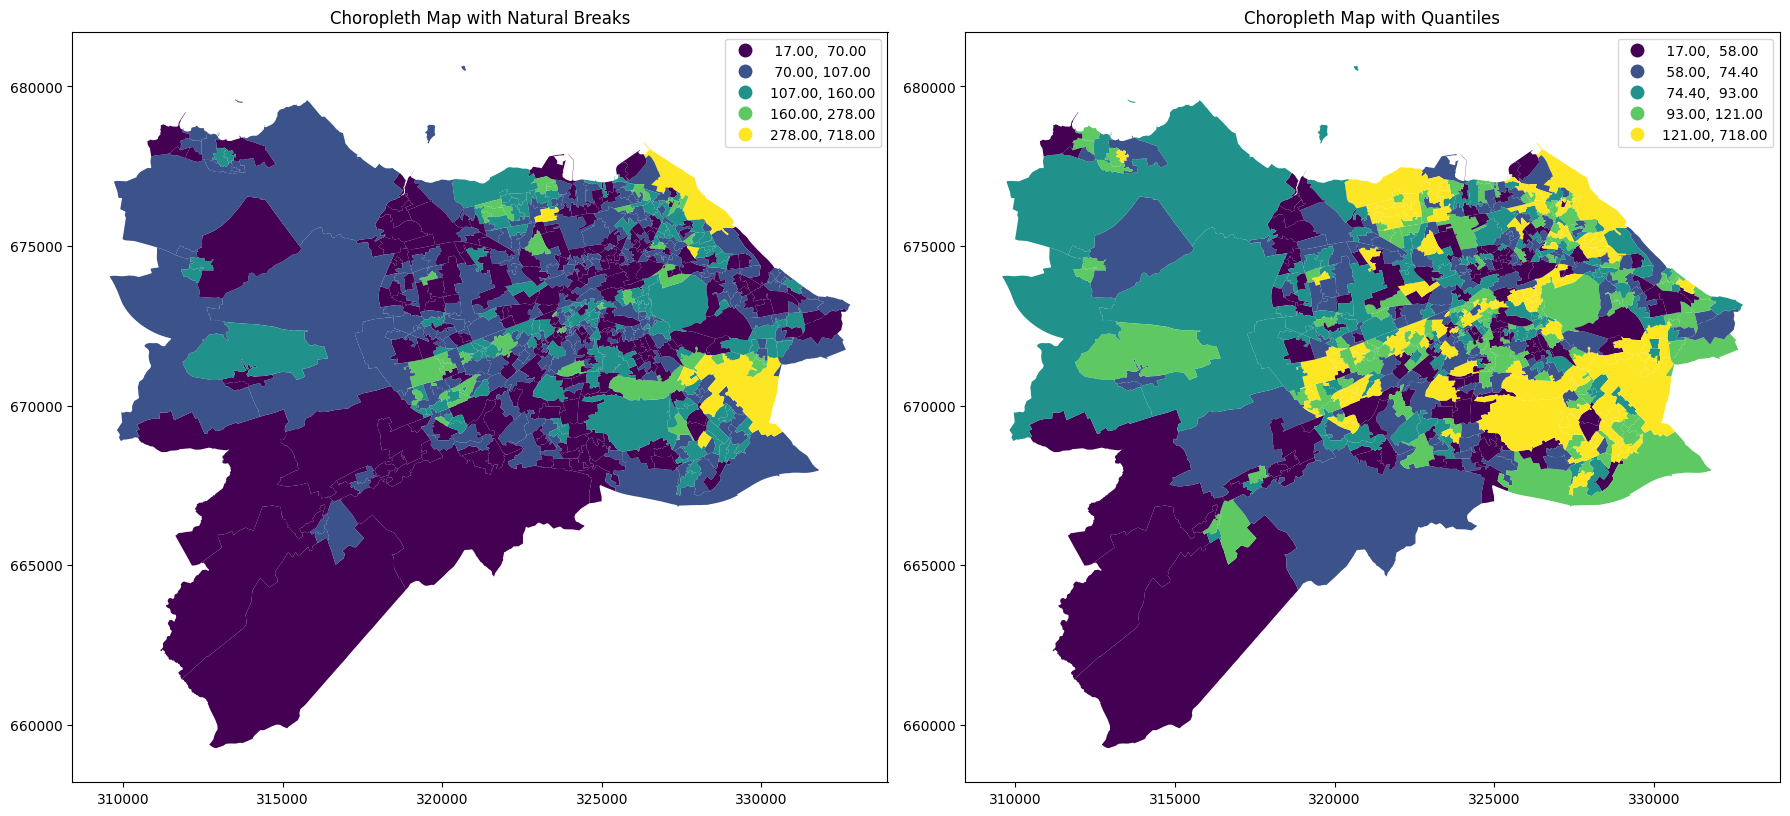

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Map using natural breaks classification
edinburgh.plot(column='HlthSMR', ax=axs[0],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_nb.bins}
        )

axs[0].set_title("Choropleth Map with Natural Breaks")

# Map using quantile classification
edinburgh.plot(column='HlthSMR', ax=axs[1],
         legend=True, cmap='viridis',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_q.bins})

axs[1].set_title("Choropleth Map with Quantiles")

plt.tight_layout()
plt.show()

#### 3.2.3 Interactive maps

In the last step, we create interactive maps vizualizing income rank across data zones in both Glasgow and Edinburgh. In both cases, first, we define classification scheme using natural breaks and we visualize it in interactive maps.

In [17]:
# Load data for Glasgow
shapefile_path = 'data_lab4/SIMD_2020_GlasgowCity.shp'
gdf = gpd.read_file(shapefile_path)

In [18]:
# Glasgow: apply classification scheme
num_classes = 5

classif_nb = mc.NaturalBreaks(gdf['IncRankv2'], k=num_classes)
gdf['classif_nb'] = classif_nb.yb 

print(classif_nb)
print(gdf[['IncRankv2', 'classif_nb']])

NaturalBreaks

     Interval        Count
--------------------------
[   1.00,  790.00] |   261
( 790.00, 1926.00] |   148
(1926.00, 3366.00] |   120
(3366.00, 5014.00] |   126
(5014.00, 6969.00] |    91
     IncRankv2  classif_nb
0       5861.5           4
1         23.0           0
2       1083.0           1
3       2784.0           2
4        830.0           1
..         ...         ...
741       41.0           0
742      311.0           0
743     1024.0           1
744     2026.0           2
745      198.0           0

[746 rows x 2 columns]


In [ ]:
import plotly.express as px

# Glasgow: Create an interactive map
fig = px.choropleth_mapbox(gdf,
                           geojson=gdf.geometry,
                           locations=gdf.index,
                           color="classif_nb",
                           color_continuous_scale="viridis",
                           range_color= (1, 5),
                           opacity=0.5,
                           center={"lat": 55.866193, "lon": -4.258246},
                           mapbox_style="carto-positron",
                           zoom=9.5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

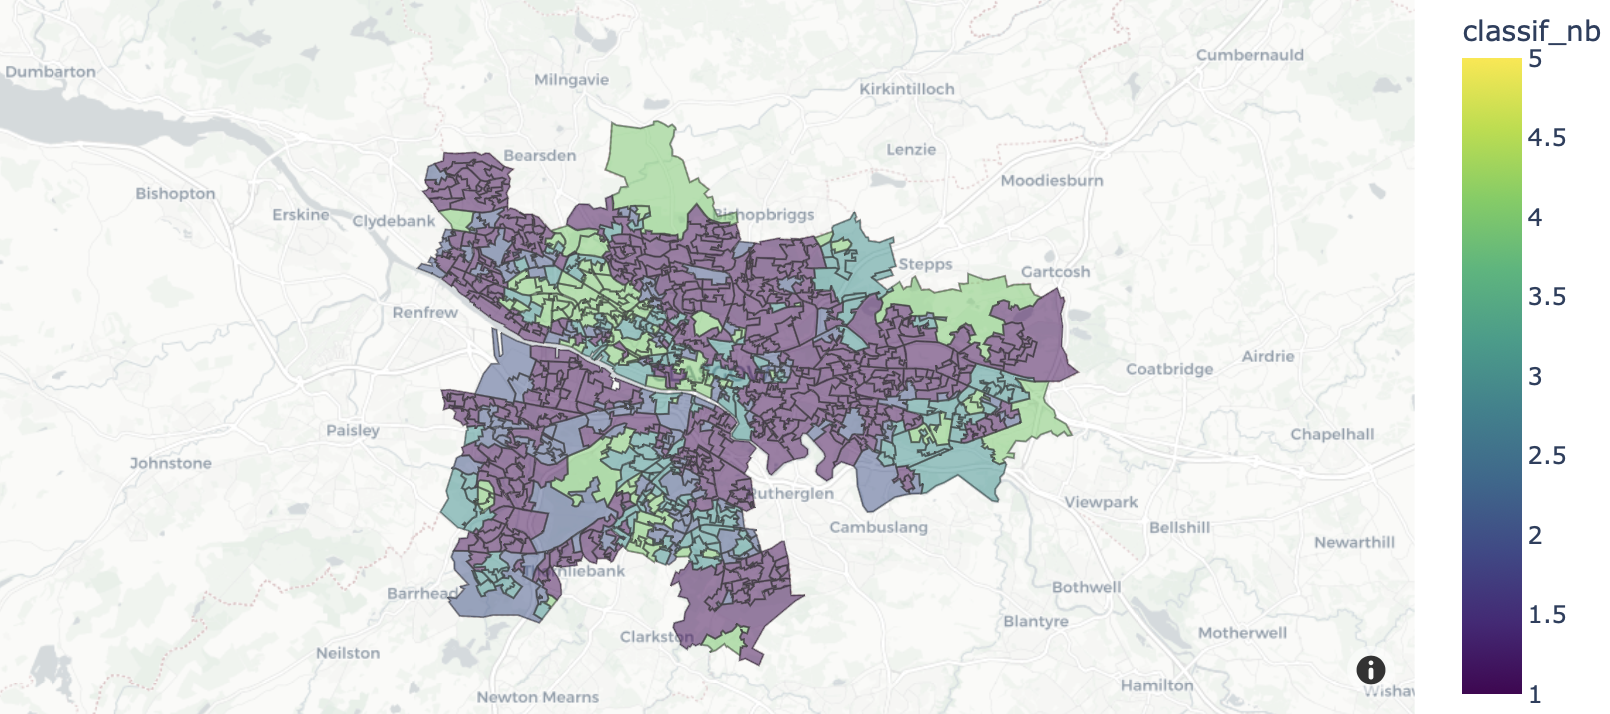

In [21]:
# Edinburgh: apply the classification scheme
classif_n = mc.NaturalBreaks(edinburgh['IncRankv2'], k=num_classes)
edinburgh['classif_n'] = classif_n.yb 

print(edinburgh[['IncRankv2', 'classif_n']])

      IncRankv2  classif_n
1911     5218.5          3
1912     6236.5          4
1913     4861.0          3
1914     6298.0          4
1915     3330.5          2
...         ...        ...
2503     1506.0          0
2504     5509.0          3
2505     6803.5          4
2506     6897.0          4
2507     6790.0          4

[597 rows x 2 columns]


/Users/ninabucekova/miniconda3/envs/ua/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig2 = px.choropleth_mapbox(edinburgh,
                           geojson=edinburgh.geometry,
                           locations=edinburgh.index,
                           color="classif_n",
                           color_continuous_scale="viridis",
                           range_color= (1, 5),
                           opacity=0.5,
                           center={"lat": 55.951854, "lon": -3.188550}, 
                           mapbox_style="carto-positron",
                           zoom=9.5)
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2.show()